## Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Dataset Description

In [ ]:
import pandas as pd

file_path = "/content/drive/My Drive/waterborne_200_survery_data.csv"
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


,Unnamed: 0,household_size,children_under_5,elderly_60+,primary_occupation,education_level,storage_type,water_treatment_method,diarrhoea_cases_pre,diarrhoea_cases_post,typhoid_cases_pre,typhoid_cases_post,cholera_cases_pre,cholera_cases_post,sought_treatment,hospitalized,believes_water_crisis_caused_disease,interested_in_water_filters
0,0,5,0,0,Agriculture,No Education,Metal Container,No Filtration,0,5,0,1,0,0,Yes,No,No,Yes
1,1,6,0,1,Business,Higher,Open Bucket,Chlorination,0,0,0,0,0,0,Yes,No,Yes,Yes
2,2,4,1,1,Business,Secondary,Closed Drum,No Filtration,0,2,0,1,1,0,Yes,No,Yes,No
3,3,6,0,1,Agriculture,Primary,Metal Container,SODIS,1,0,1,0,0,0,Yes,Yes,Yes,Yes
4,4,6,1,1,Govt Job,Higher,Closed Drum,Chlorination,0,0,0,1,1,0,Yes,Yes,Yes,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Unnamed: 0                            200 non-null    int64 
 1   household_size                        200 non-null    int64 
 2   children_under_5                      200 non-null    int64 
 3   elderly_60+                           200 non-null    int64 
 4   primary_occupation                    200 non-null    object
 5   education_level                       200 non-null    object
 6   storage_type                          200 non-null    object
 7   water_treatment_method                200 non-null    object
 8   diarrhoea_cases_pre                   200 non-null    int64 
 9   diarrhoea_cases_post                  200 non-null    int64 
 10  typhoid_cases_pre                     200 non-null    int64 
 11  typhoid_cases_post              

In [ ]:
df.describe()

,Unnamed: 0,household_size,children_under_5,elderly_60+,diarrhoea_cases_pre,diarrhoea_cases_post,typhoid_cases_pre,typhoid_cases_post,cholera_cases_pre,cholera_cases_post
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000
mean,99.500000,4.535000,0.745000,0.470000,0.515000,1.500000,0.175000,0.32500,0.065000,0.205000
std,57.879185,1.680146,0.708863,0.539029,1.065576,2.081264,0.406449,0.46955,0.247144,0.404715
min,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,49.750000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,99.500000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,149.250000,6.000000,1.000000,1.000000,0.000000,3.000000,0.000000,1.00000,0.000000,0.000000
max,199.000000,7.000000,2.000000,2.000000,4.000000,6.000000,2.000000,1.00000,1.000000,1.000000


### Converting categorical columns to categorical data type

In [ ]:
categorical_cols = ['primary_occupation', 'education_level', 'storage_type',
                    'water_treatment_method', 'sought_treatment', 'hospitalized',
                    'believes_water_crisis_caused_disease', 'interested_in_water_filters']
for col in categorical_cols:
    df[col] = df[col].astype('category')

## EDA

### Numerical Features

1. Household Size

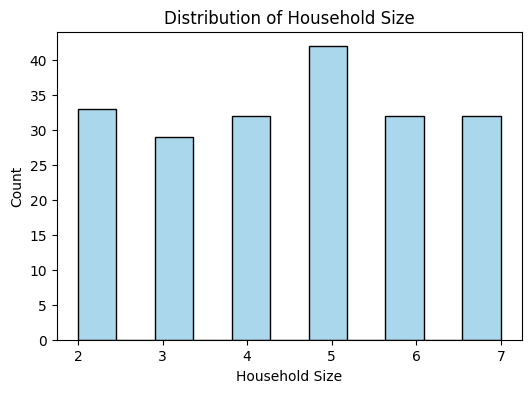

Text(0.5, 0, 'Household Size')

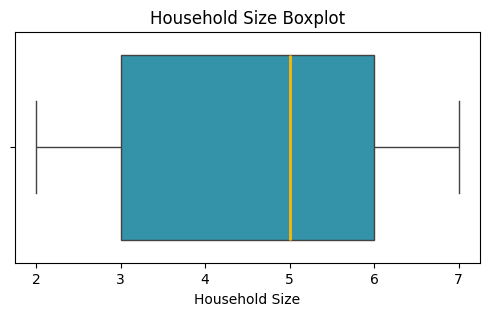

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df['household_size'], kde=False, color="#8ECAE6", binwidth=0.45)
plt.title("Distribution of Household Size")
plt.xlabel("Household Size")
plt.show()


plt.figure(figsize=(6, 3))
sns.boxplot(x=df['household_size'],
            color="#219ebc",
            medianprops=dict(color="#ffb703", linewidth=2))

plt.title("Household Size Boxplot")
plt.xlabel("Household Size")

2. Children under 5 years old

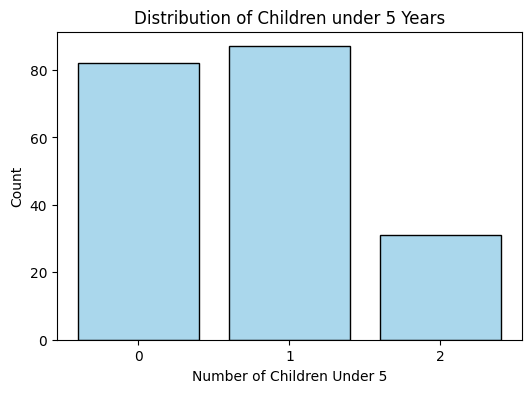

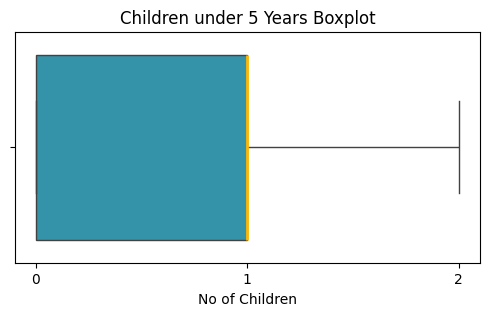

In [ ]:
plt.figure(figsize=(6, 4))

# Histogram with spacing using 'shrink'
sns.histplot(df['children_under_5'], kde=False, color="#8ECAE6", binwidth=1, discrete=True, shrink=0.8)

# Set x-axis ticks to whole numbers
plt.xticks(np.arange(df['children_under_5'].min(), df['children_under_5'].max() + 1, 1))

plt.title("Distribution of Children under 5 Years")
plt.xlabel("Number of Children Under 5")
plt.ylabel("Count")
plt.show()


# Boxplot for Children under 5 Years
plt.figure(figsize=(6, 3))

sns.boxplot(x=df['children_under_5'],
            color="#219EBC",
            medianprops=dict(color="#FFB703", linewidth=2))

plt.xticks(np.arange(df['children_under_5'].min(), df['children_under_5'].max() + 1, 1))  # Ensure whole number ticks
plt.title("Children under 5 Years Boxplot")
plt.xlabel("No of Children")
plt.show()


3. Elderly Over 60 years old

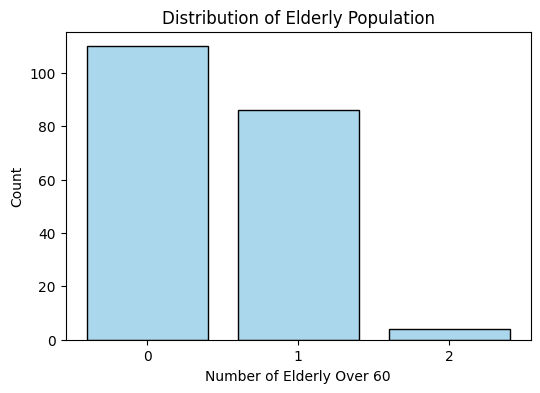

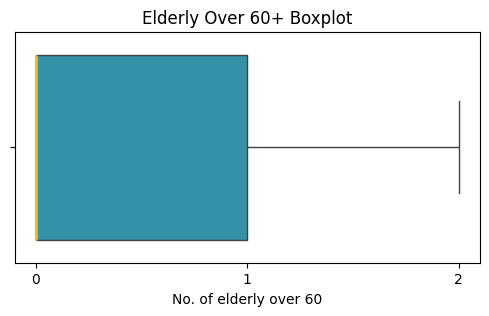

In [ ]:
plt.figure(figsize=(6, 4))

sns.histplot(df['elderly_60+'], kde=False, color="#8ECAE6", binwidth=1, discrete=True, shrink=0.8)

plt.xticks(np.arange(df['elderly_60+'].min(), df['elderly_60+'].max() + 1, 1))

plt.title("Distribution of Elderly Population")
plt.xlabel("Number of Elderly Over 60")
plt.ylabel("Count")

plt.show()


plt.figure(figsize=(6, 3))
sns.boxplot(x=df['elderly_60+'],
            color="#219ebc",
            medianprops=dict(color="#ffb703", linewidth=2))
plt.xticks(np.arange(df['elderly_60+'].min(), df['elderly_60+'].max() + 1, 1))
plt.xlabel("No. of elderly over 60")
plt.title("Elderly Over 60+ Boxplot")
plt.show()

### Categorical Features

1. Distribution of Education Level

Text(0, 0.5, 'Count')

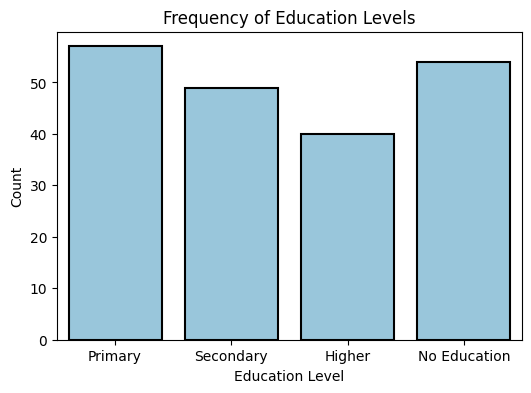

In [ ]:
plt.figure(figsize=(6, 4))

order = ["Primary", "Secondary", "Higher", "No Education"]
sns.countplot(x='education_level', data=df, color="#8ECAE6", edgecolor="black", linewidth=1.5, order=order)

plt.title("Frequency of Education Levels")
plt.xlabel("Education Level")
plt.ylabel("Count")

2. Distribution of Primary Occupation

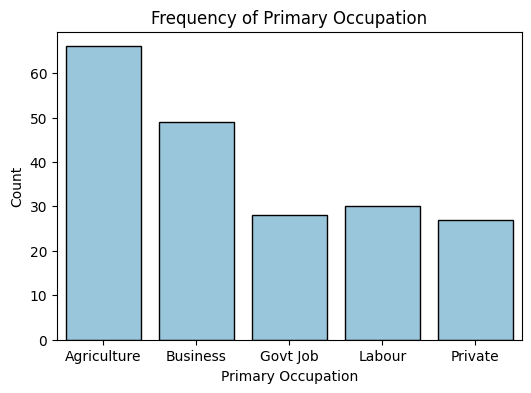

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='primary_occupation', data=df, color="#8ECAE6", edgecolor="black", linewidth=1.0)
plt.title("Frequency of Primary Occupation")
plt.xlabel("Primary Occupation")
plt.ylabel("Count")
plt.show()

3. Distribution of Water Storage

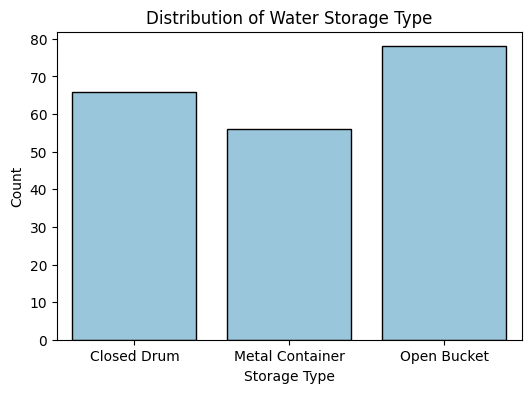

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='storage_type', data=df, color="#8ECAE6", edgecolor="black", linewidth=1.0)
plt.title("Distribution of Water Storage Type")
plt.xlabel("Storage Type")
plt.ylabel("Count")
plt.show()

4. Distribution of Water Filtration Methods

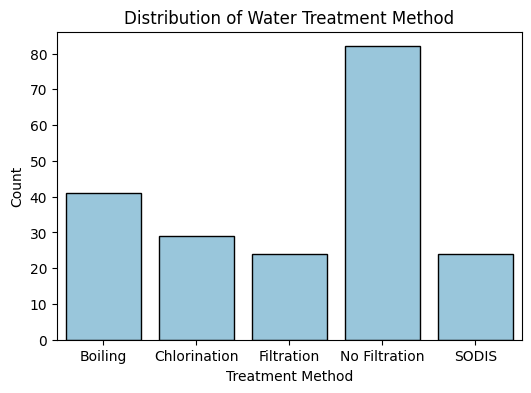

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='water_treatment_method', data=df, color="#8ECAE6", edgecolor="black", linewidth=1.0)
plt.title("Distribution of Water Treatment Method")
plt.xlabel("Treatment Method")
plt.ylabel("Count")
plt.show()

5. Comparision of Waterborne Disease Cases (Pre and Post)

In [ ]:
disease_cols = ['diarrhoea_cases_pre', 'diarrhoea_cases_post',
                'typhoid_cases_pre', 'typhoid_cases_post',
                'cholera_cases_pre', 'cholera_cases_post']
df[disease_cols].describe()

,diarrhoea_cases_pre,diarrhoea_cases_post,typhoid_cases_pre,typhoid_cases_post,cholera_cases_pre,cholera_cases_post
count,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000
mean,0.515000,1.500000,0.175000,0.32500,0.065000,0.205000
std,1.065576,2.081264,0.406449,0.46955,0.247144,0.404715
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,0.000000,3.000000,0.000000,1.00000,0.000000,0.000000
max,4.000000,6.000000,2.000000,1.00000,1.000000,1.000000


Total Cases by Disease Category:
diarrhoea_cases_pre     103
diarrhoea_cases_post    300
typhoid_cases_pre        35
typhoid_cases_post       65
cholera_cases_pre        13
cholera_cases_post       41
dtype: int64

Grand Total of All Disease Cases: 557


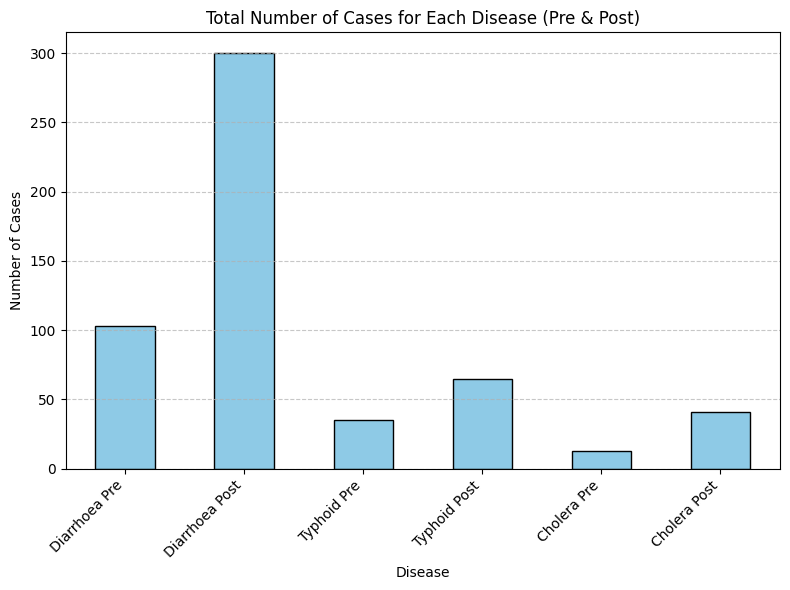

In [ ]:
disease_sums = df[disease_cols].sum()

df['Total_Cases'] = df[disease_cols].sum(axis=1)

print("Total Cases by Disease Category:")
print(disease_sums)

# Calculating grand total of all disease cases
grand_total = df['Total_Cases'].sum()
print(f"\nGrand Total of All Disease Cases: {grand_total}")

# Custom labels for better readability
custom_labels = {
    'diarrhoea_cases_pre': 'Diarrhoea Pre',
    'diarrhoea_cases_post': 'Diarrhoea Post',
    'typhoid_cases_pre': 'Typhoid Pre',
    'typhoid_cases_post': 'Typhoid Post',
    'cholera_cases_pre': 'Cholera Pre',
    'cholera_cases_post': 'Cholera Post'
}

plt.figure(figsize=(8, 6))
ax = disease_sums.plot(kind='bar', color='#8ECAE6', edgecolor="black", linewidth=1)

# Rename x-axis labels using custom labels
ax.set_xticklabels([custom_labels[col] for col in disease_sums.index], rotation=45, ha='right')

plt.title("Total Number of Cases for Each Disease (Pre & Post)")
plt.xlabel("Disease")
plt.ylabel("Number of Cases")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Chi Square (Post inaccess to clean drinking water)

### Hypothesis 1: Water Filtration and Waterborne Cases

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
df['water_treatment_binary'] = np.where(df['water_treatment_method'] == 'No Filtration', 0, 1)

In [ ]:
# Create Total_Cases as the sum of waterborne disease cases
disease_cols = ['diarrhoea_cases_post', 'typhoid_cases_post', 'cholera_cases_post']
df['Total_Cases'] = df[disease_cols].sum(axis=1)

# Categorize Total_Cases into "High" and "Low" using the median
median_cases = df['Total_Cases'].median()
df['case_category'] = np.where(df['Total_Cases'] > median_cases, 'High', 'Low')

print(df[['Total_Cases', 'case_category']].head(10))

   Total_Cases case_category
0            6          High
1            0           Low
2            3          High
3            0           Low
4            1           Low
5            0           Low
6            0           Low
7            0           Low
8            0           Low
9            0           Low


### Contingency Table

In [ ]:
contingency_table = pd.crosstab(df['water_treatment_binary'], df['case_category'])
print("Contingency Table for Water Treatment Binary vs. Case Category:")
print(contingency_table)

Contingency Table for Water Treatment Binary vs. Case Category:
case_category           High  Low
water_treatment_binary           
0                         28   54
1                         57   61


Text(45.72222222222221, 0.5, 'Water Filtration')

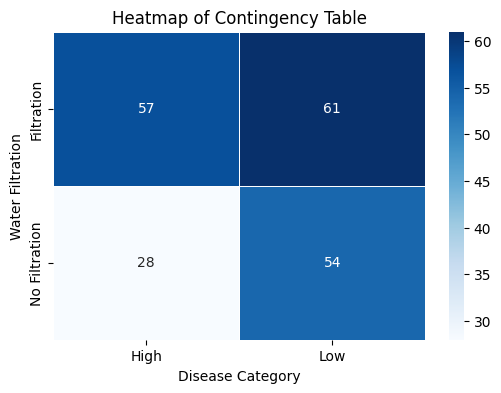

In [ ]:
data = {
    'Water Filtration': ['No Filtration', 'No Filtration', 'Filtration', 'Filtration'],
    'Disease Category': ['High', 'Low', 'High', 'Low'],
    'Count': [28, 54, 57, 61]
}

df_contingency = pd.DataFrame(data)

# Convert to pivot table format for heatmap
pivot_table = df_contingency.pivot(index='Water Filtration', columns='Disease Category', values='Count')

plt.figure(figsize=(6, 4))
sns.heatmap(pivot_table, annot=True, cmap="Blues", fmt="d", linewidths=0.5)
plt.title('Heatmap of Contingency Table')
plt.xlabel('Disease Category')
plt.ylabel('Water Filtration')

In [ ]:
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square Test Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("p-value:", p_value)

Chi-Square Test Statistic: 3.410553070375301
Degrees of Freedom: 1
p-value: 0.06478073132176684


### Hypothesis 2: Water Storage and Waterborne Cases

In [ ]:
safe_storage = ['Closed Drum', 'Metal Container']
unsafe_storage = ['Open Bucket']

# Binary column: 1 for safe storage, 0 for unsafe storage
df['water_storage_binary'] = df['storage_type'].apply(lambda x: 1 if x in safe_storage else 0)

print(df['water_storage_binary'].value_counts())


water_storage_binary
1    122
0     78
Name: count, dtype: int64


### Contingency Table

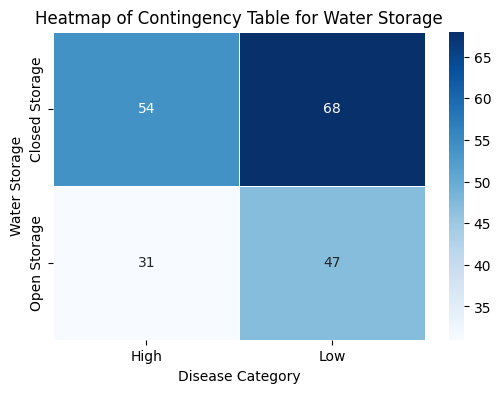

In [ ]:
data = {
    'Water Storage': ['Open Storage', 'Open Storage', 'Closed Storage', 'Closed Storage'],
    'Disease Category': ['High', 'Low', 'High', 'Low'],
    'Count': [31, 47, 54, 68]
}

df_contingency = pd.DataFrame(data)

pivot_table = df_contingency.pivot(index='Water Storage', columns='Disease Category', values='Count')

plt.figure(figsize=(6, 4))
sns.heatmap(pivot_table, annot=True, cmap="Blues", fmt="d", linewidths=0.5)

plt.title('Heatmap of Contingency Table for Water Storage')
plt.xlabel('Disease Category')
plt.ylabel('Water Storage')

plt.show()

In [ ]:
contingency_table_storage = pd.crosstab(df['water_storage_binary'], df['case_category'])
print("Contingency Table for Water Storage Binary vs. Case Category:")
print(contingency_table_storage)

# Perform the chi-square test
chi2_storage, p_value_storage, dof_storage, expected_storage = chi2_contingency(contingency_table_storage)
print("Chi-Square Test for Water Storage:")
print("Test Statistic:", chi2_storage)
print("Degrees of Freedom:", dof_storage)
print("p-value:", p_value_storage)


Contingency Table for Water Storage Binary vs. Case Category:
case_category         High  Low
water_storage_binary           
0                       31   47
1                       54   68
Chi-Square Test for Water Storage:
Test Statistic: 0.23414596388475883
Degrees of Freedom: 1
p-value: 0.6284665545045056
